In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout
from keras import regularizers
from tensorflow.keras.utils import plot_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

In [2]:
train_data = np.load('data_for_training.npz')
data = train_data['images']
labels = train_data['labels']


X_train, X_temp, y_train, y_temp = train_test_split(data, labels, test_size=0.4, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f'Training set size: {X_train.shape}')
print(f'Validation set size: {X_val.shape}')
print(f'Test set size: {X_test.shape}')

Training set size: (360, 32, 64, 45)
Validation set size: (120, 32, 64, 45)
Test set size: (120, 32, 64, 45)


In [3]:
model = Sequential([
    Conv3D(filters=4, kernel_size=(3, 3, 3), activation='relu', input_shape=(32, 64, 45, 1), kernel_regularizer=regularizers.l2(l=0.001)),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Conv3D(filters=8, kernel_size=(3, 3, 3), activation='relu', kernel_regularizer=regularizers.l2(l=0.001)),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Flatten(),
    Dense(units=16, activation='relu'),
    Dense(units=3, activation='softmax') 
    
])

2024-08-23 12:26:27.033240: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-08-23 12:26:27.033265: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-08-23 12:26:27.033270: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-08-23 12:26:27.033337: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-23 12:26:27.033638: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 30, 62, 43, 4)     112       
                                                                 
 max_pooling3d (MaxPooling3  (None, 15, 31, 21, 4)     0         
 D)                                                              
                                                                 
 conv3d_1 (Conv3D)           (None, 13, 29, 19, 8)     872       
                                                                 
 max_pooling3d_1 (MaxPoolin  (None, 6, 14, 9, 8)       0         
 g3D)                                                            
                                                                 
 flatten (Flatten)           (None, 6048)              0         
                                                                 
 dense (Dense)               (None, 16)                9

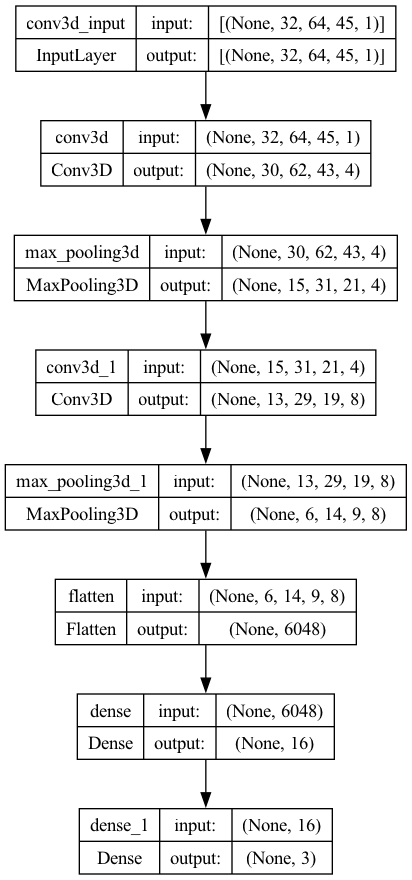

In [4]:
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [5]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=120
)

Epoch 1/100


2024-08-23 12:26:28.038039: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - ETA: 0s - loss: 1.0716 - accuracy: 0.4417

2024-08-23 12:26:36.353990: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 9s 3s/step - loss: 1.0716 - accuracy: 0.4417 - val_loss: 0.9461 - val_accuracy: 0.4333
Epoch 2/100
3/3 [==============================] - 9s 3s/step - loss: 0.9167 - accuracy: 0.4639 - val_loss: 0.8588 - val_accuracy: 0.5250
Epoch 3/100
3/3 [==============================] - 9s 3s/step - loss: 0.8165 - accuracy: 0.5722 - val_loss: 0.7706 - val_accuracy: 0.6750
Epoch 4/100
3/3 [==============================] - 8s 3s/step - loss: 0.7233 - accuracy: 0.7417 - val_loss: 0.6936 - val_accuracy: 0.7750
Epoch 5/100
3/3 [==============================] - 8s 3s/step - loss: 0.6288 - accuracy: 0.8417 - val_loss: 0.6147 - val_accuracy: 0.8000
Epoch 6/100
3/3 [==============================] - 8s 3s/step - loss: 0.5410 - accuracy: 0.8778 - val_loss: 0.5484 - val_accuracy: 0.8583
Epoch 7/100
3/3 [==============================] - 8s 3s/step - loss: 0.4654 - accuracy: 0.8917 - val_loss: 0.4839 - val_accuracy: 0.8750
Epoch 8/100
3/3 [=============================

In [6]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

2024-08-23 12:39:45.410746: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 1s 131ms/step - loss: 0.2069 - accuracy: 0.9917
Test loss: 0.20685115456581116
Test accuracy: 0.9916666746139526


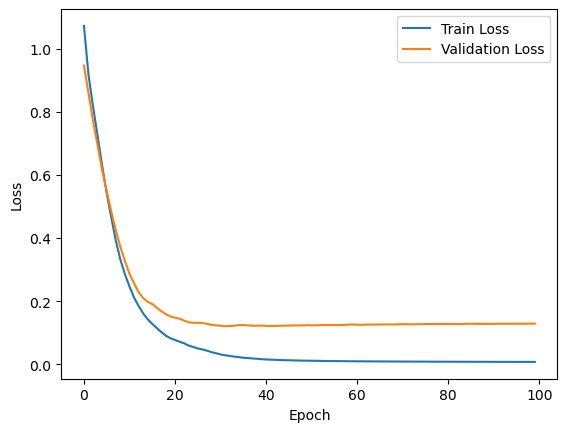

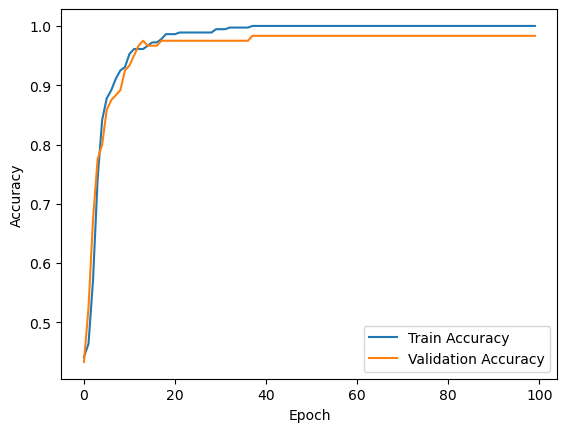

In [9]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [8]:
model.save('3d_cnn_model.h5')

/Users/seanhuang/anaconda3/envs/mmwave/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
